In [1]:
# !pip install pandas tensorflow scikit-learn transformers matplotlib nltk

### Import library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\Alief\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alief\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alief\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# if you use google colab, uncomment this code
#from google.colab import drive
#drive.mount('/content/drive')

### Load dataset

In [5]:
# google colab
# df_pidana_umum = pd.read_csv("drive/MyDrive/Colab Notebooks/Dataset_PeduliPasal/dataset_pidana_umum.csv")
# df_pidana_khusus = pd.read_csv("drive/MyDrive/Colab Notebooks/Dataset_PeduliPasal/dataset_pidana_khusus.csv")

# local computer
df_pidana_umum = pd.read_csv("../data/dataset_csv/dataset_pidana_umum.csv")
df_pidana_khusus = pd.read_csv("../data/dataset_csv/dataset_pidana_khusus.csv")

df = pd.concat([df_pidana_umum, df_pidana_khusus], ignore_index=True)

### EDA

In [6]:
df.head()

,amar,amar_lainnya,id,klasifikasi,lama_hukuman,lembaga_peradilan,provinsi,status,sub_klasifikasi,url,...,identitas,riwayat_penahanan,riwayat_perkara,riwayat_tuntutan,riwayat_dakwaan,fakta,amar_putusan,penutup,fakta_hukum,pertimbangan_hukum
0,pidana,hukum,00035681c8d944203f25d2e8215ae2bf,pidana-umum,210,pn-kudus,jateng,berkekuatan-hukum-tetap,pemalsuan,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap eny sulistiyaningsih binti mashad...,terdakwa ditahan dengan jenis tahanan rutan se...,pengadilan negeri tersebut\nsetelah membaca be...,setelah mendengar tuntutan requsitoir penuntut...,menimbang bahwa terdakwa diajukan di persidang...,menimbang bahwa selanjutnya untuk membuktikan ...,mengadili 1 menyatakan terdakwa eny sulistiyan...,demikian diputuskan dalam rapat permusyawarata...,NaN,NaN
1,pidana,hukum,000399ce26773e18695ce14f519cb9e6,pidana-umum,720,pn-demak,jateng,berkekuatan-hukum-tetap,pencurian,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap ali maftuhin bin nur salim tempat...,terdakwa ditahan di rumah tahanan negara berda...,pengadilan negeri tersebut\nsetelah membaca\np...,setelah mendengar surat tuntutan pidana requis...,menimbang bahwa terdakwa didakwa oleh penuntut...,menimbang bahwa untuk menguatkan dakwaan terse...,mengadili 1 menyatakan terdakwa ali maftuhin b...,demikianlah diputuskan dalam rapat permusyawar...,menimbang bahwa berdasarkan keterangan saksi s...,NaN
2,pidana,jatuh-pidana-oleh-karena-itu-kepada-dakwa-ir-b...,0006582ad67cd9bd1ddf4261a09bf382,pidana-umum,120,pn-kediri,jatim,berkekuatan-hukum-tetap,kejahatan-terhadap-keamanan-negara,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap ir bambang sasongko bin r soewarn...,terdakwa tidak ditahan,terdakwa didampingi oleh penasehat hukumnya ya...,telah mendengar pembacaan tuntutan pidana oleh...,menimbang bahwa terdakwa diajukan di persidang...,menimbang bahwa selanjutnya dipersidangan tela...,mengadili\n1 menyatakan terdakwa ir bambang sa...,demikian diputuskan dalam rapat musyawarah maj...,NaN,NaN
3,pidana,hukum,00122b1be15a10ad474bb3b7ec0dea73,pidana-umum,90,pn-sampang,jatim,berkekuatan-hukum-tetap,penghinaan,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap ahmad al pak saki tempat lahir sa...,NaN,terdakwa dipersidangan tidak didampingi oleh p...,telah mendengar tuntutan pidana dari penuntut ...,menimbang bahwa berdasarkan catatan penuntut u...,menimbang bahwa dalam persidangan telah dideng...,mengadili 1 menyatakan terdakwa ahmad al pak s...,demikian diputuskan pada hari senin tanggal 5 ...,menimbang bahwa berdasarkan keterangan saksi s...,NaN
4,pidana,hukum,00136d1554e18c63256deac42aad0c58,pidana-umum,210,pn-cirebon,jabar,berkekuatan-hukum-tetap,pencurian,https://putusan3.mahkamahagung.go.id/direktori...,...,1 nama lengkap muhamad rizki als rizki bin edi...,terdakwa ditangkap pada tanggal juli 2019\nter...,terdakwa tidak didampingi penasihat hukum\npen...,setelah mendengar pembacaan tuntutan pidana ya...,menimbang bahwa terdakwa diajukan ke persidang...,menimbang bahwa untuk membuktikan dakwaannya p...,mengadili\n1 menyatakan terdakwa muhamad rizki...,demikian diputuskan dalam sidang permusyawarat...,menimbang bahwa berdasarkan alat bukti dan bar...,menimbang bahwa selanjutnya majelis hakim akan...


In [7]:
df.info(),df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22630 entries, 0 to 22629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   amar                22630 non-null  object
 1   amar_lainnya        22630 non-null  object
 2   id                  22630 non-null  object
 3   klasifikasi         22630 non-null  object
 4   lama_hukuman        22630 non-null  int64 
 5   lembaga_peradilan   22630 non-null  object
 6   provinsi            22630 non-null  object
 7   status              22630 non-null  object
 8   sub_klasifikasi     22630 non-null  object
 9   url                 22630 non-null  object
 10  kepala_putusan      22628 non-null  object
 11  identitas           19749 non-null  object
 12  riwayat_penahanan   18644 non-null  object
 13  riwayat_perkara     22369 non-null  object
 14  riwayat_tuntutan    21667 non-null  object
 15  riwayat_dakwaan     22297 non-null  object
 16  fakta               21

(None,
 amar                  22630
 amar_lainnya          22630
 id                    22630
 klasifikasi           22630
 lama_hukuman          22630
 lembaga_peradilan     22630
 provinsi              22630
 status                22630
 sub_klasifikasi       22630
 url                   22630
 kepala_putusan        22628
 identitas             19749
 riwayat_penahanan     18644
 riwayat_perkara       22369
 riwayat_tuntutan      21667
 riwayat_dakwaan       22297
 fakta                 21827
 amar_putusan          22617
 penutup               22194
 fakta_hukum           10616
 pertimbangan_hukum    10730
 dtype: int64)

In [8]:
# Clearning data
# Features and label
features = ['riwayat_dakwaan', 'amar_putusan', 'fakta']
label = 'sub_klasifikasi'

# Drop miss value
df = df.dropna(subset=features + [label])

### Preprocessing data

In [9]:
# Define the Fetures and label
X = df[features].fillna('').agg(' '.join, axis=1)
y = df[label]

#
sub_classification = y.unique()

# Encode Label
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

print("Encoded Labels:", labels_encoded)
print("Number of Classes:", num_classes)

Encoded Labels: [28 37 11 ... 25  0 25]
Number of Classes: 64


In [10]:
# save the label
df_sub_classification = pd.DataFrame(sub_classification)

# if you use local computer
df_sub_classification.to_csv("../data/dataset_csv/data_classfication.csv", index=False)

# if you use google colab
# df_sub_classification.to_csv("drive/MyDrive/Colab Notebooks/Dataset_PeduliPasal/data_classfication.csv", index=False)

In [11]:
MODEL_NAME = "indolem/indobert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
pre_trained_model = TFAutoModel.from_pretrained(MODEL_NAME, from_pt=True)

c:\Users\Alief\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alief\.cache\huggingface\hub\models--indolem--indobert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model T

#### Define function for normalize text

In [12]:
stop_words = set(stopwords.words('indonesian'))

porter = PorterStemmer()

MAX_LENGTH = 128

def normalize_text(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.lower() for token in tokens]
  tokens = [token for token in tokens if token not in stop_words]
  tokens = [porter.stem(token) for token in tokens]
  return ' '.join(tokens)

def encode_texts(texts, tokenizer, max_length=MAX_LENGTH):
  return tokenizer(
    texts,
    max_length=MAX_LENGTH,
    padding="max_length",
    truncation=True
  )

#### Test function normalize text and encoded texts

In [13]:
test_normlize_text = normalize_text(X[0])
print(f"Normalize data: {test_normlize_text}")

test_encoded_text = encode_texts([test_normlize_text], tokenizer)
print(f"Encoded data: {test_encoded_text['input_ids']}")

Normalize data: menimbang terdakwa diajukan persidangan didakwa tindak pidana dakwaan penuntut ke ##atu terdakwa en ##i suli ##ti ##yani ##ng ##sih binti mash ##adi rabu tanggal 04 septemb 2013 sekira jam 15 00 wib setidak tidaknya septemb 2013 bertempat kantor kud mint ##orogo cabang mej ##obo desa tengg ##ele rt 05 rw 04 kecamatan mej ##obo kabupaten kudu daerah hukum pengadilan negeri kudu berwenang memeriksa mengadili perkara ##nya surat palsu memalsukan surat menerbitkan hak perjanjian kewajiban perbuatan maksud menyuruh orang surat surat olah surat asli palsu ##kan ##nya kerugian perbuatan terdakwa senin tanggal 02 septemb 2013 sekira jam 13 00 wib terdakwa saksi ak ##mal ##ia kasi ##r kud min jati ##ro ##go cabang pembantu mej ##obo menyerahkan 1 lembar bil ##yet sim ##ka anggota kud mint ##orogo unit simpan pinjam no sim ##ka 41 03 ##0 00 ##14 ##8 00 tanggal 4 septemb 2012 nama sri ku ##tina ##h alamat ds mla ##ti lor no 40 ##1 a rt 05 rw ii kec kota kab kudu simpanan rp 20 000

#### Normalize dan encoded texts

In [14]:
X_normalized_texts = X.apply(normalize_text)

In [15]:
X_normalized_texts_list = X_normalized_texts.tolist()

X_encoded = tokenizer(
    X_normalized_texts_list,
    max_length=MAX_LENGTH,
    padding="max_length",
    truncation=True
)

In [16]:
input_ids = X_encoded["input_ids"]
attention_masks = X_encoded["attention_mask"]

In [17]:
# Split data to train and test
X_train_ids, X_test_ids, y_train, y_test = train_test_split(input_ids, labels_encoded, test_size=0.2, random_state=42)
X_train_masks, X_test_masks = train_test_split(attention_masks, test_size=0.2, random_state=42)

### Model

#### Create model

In [18]:
def create_model(max_length=MAX_LENGTH):
  # Input layer
  input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
  attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

  # Pre-trained IndoBERT
  model_output = pre_trained_model(input_ids, attention_mask=attention_mask)
  cls_token = model_output.last_hidden_state[:, 0]

  # Fully Connected Layers for klasifikasi
  x = tf.keras.layers.Dense(256, activation="relu")(cls_token)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(128, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  output = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

  # Definisikan model
  model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
  return model

In [19]:
model = create_model()

In [20]:
# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  110558208   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

#### Train model

In [21]:
# Train Model
history = model.fit(
    [np.array(X_train_ids), np.array(X_train_masks)],
    y_train,
    validation_data=([np.array(X_test_ids), np.array(X_test_masks)], y_test),
    epochs=10,
    batch_size=16,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ]
)

Epoch 1/10
1083/1083 [==============================] - 650s 562ms/step - loss: 1.6982 - accuracy: 0.5922 - val_loss: 1.1595 - val_accuracy: 0.6973
Epoch 2/10
1083/1083 [==============================] - 600s 554ms/step - loss: 1.1236 - accuracy: 0.7036 - val_loss: 0.9943 - val_accuracy: 0.7199
Epoch 3/10
1083/1083 [==============================] - 601s 555ms/step - loss: 0.9632 - accuracy: 0.7394 - val_loss: 0.9396 - val_accuracy: 0.7400
Epoch 4/10
1083/1083 [==============================] - 600s 554ms/step - loss: 0.8507 - accuracy: 0.7673 - val_loss: 0.8838 - val_accuracy: 0.7532
Epoch 5/10
1083/1083 [==============================] - 602s 556ms/step - loss: 0.7546 - accuracy: 0.7924 - val_loss: 0.9479 - val_accuracy: 0.7509
Epoch 6/10
1083/1083 [==============================] - 602s 555ms/step - loss: 0.6649 - accuracy: 0.8178 - val_loss: 0.9367 - val_accuracy: 0.7453
Epoch 7/10
1083/1083 [==============================] - 597s 551ms/step - loss: 0.5962 - accuracy: 0.8347 - val_

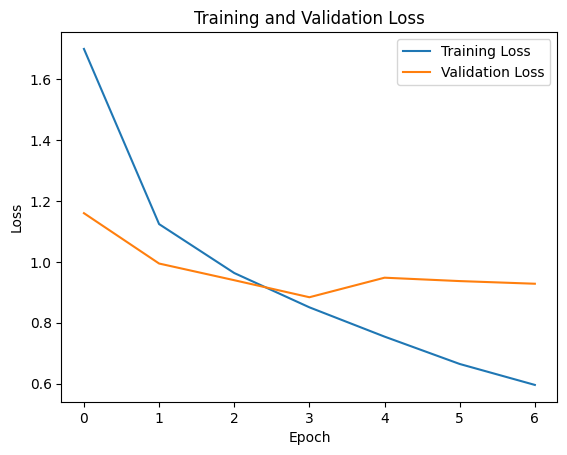

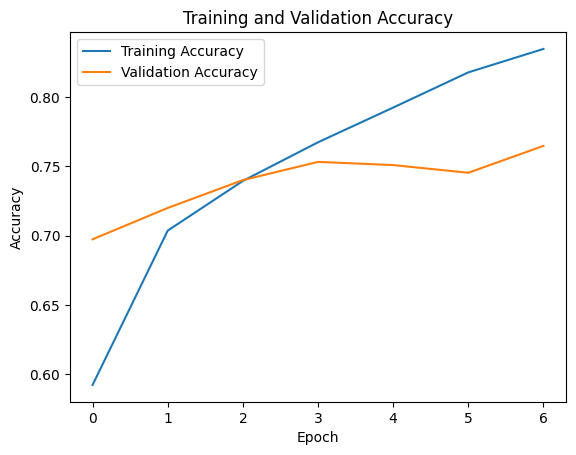

In [22]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [23]:
# Evaluasi Model
loss, accuracy = model.evaluate([np.array(X_test_ids), np.array(X_test_masks)], y_test)
print(f"Accuracy: {accuracy}")

136/136 [==============================] - 41s 297ms/step - loss: 0.8838 - accuracy: 0.7532
Accuracy: 0.7531747817993164


### Test model

In [24]:
# Prediksi pada Data Baru
predictions = model.predict({
    "input_ids": np.array(X_test_ids[:5]),
    "attention_mask": np.array(X_test_masks[:5])
})
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=1))
print("Predicted Categories:", predicted_classes)

1/1 [==============================] - 14s 14s/step
Predicted Categories: ['tidak-diketahui' 'lain-lain' 'pencurian' 'narkotika-dan-psikotropika'
 'tidak-diketahui']


In [25]:
example_text = "Menimbang, bahwa terdakwa..."
tokenized_example = tokenizer(example_text, max_length=200, padding="max_length", truncation=True)
print(tokenized_example)

{'input_ids': [3, 17572, 16, 1737, 6565, 18, 18, 18, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Save model

In [26]:
# if you use google colab, uncomment this code
# MODEL_PATH = "drive/MyDrive/Colab Notebooks/Models/model_2.h5"
# TOKENIZR_PATH = "drive/MyDrive/Colab Notebooks/Models/tokenizer_2"

# if you use local computer, uncomment this
MODEL_PATH = "../models/model_2.h5"
TOKENIZER_PATH = "../models/tokenizer_2"

model.save("saved_model", save_format="tf")

model.save(MODEL_PATH)
tokenizer.save_pretrained(TOKENIZER_PATH)

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


('../models/tokenizer_2\\tokenizer_config.json',
 '../models/tokenizer_2\\special_tokens_map.json',
 '../models/tokenizer_2\\vocab.txt',
 '../models/tokenizer_2\\added_tokens.json',
 '../models/tokenizer_2\\tokenizer.json')